In [4]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



In [5]:

# Now we need to read in the data
df = pd.read_csv(r'C:\Users\chidi\Documents\Portfolio Files\Data Analyst Portfolio Project Repository\PortfolioProjects-main\movies.csv')


In [6]:

# Select the numerical columns for correlation calculation
#numerical_fields = ['year', 'score', 'votes', 'budget', 'gross', 'runtime']
#numerical_fields = ['year', 'score', 'votes', 'budget', 'gross', 'runtime']
#numerical_df = df[numerical_fields]

# Calculate the correlation matrix
#correlation_matrix = numerical_df.corr(method ='pearson')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [87]:
# Replace non-finite values with 0 in "budget" column
df['budget'] = df['budget'].fillna(0)

# Replace non-finite values with 0 in "gross" column
df['gross'] = df['gross'].fillna(0)


In [88]:
# Convert the "budget" column to int64
df['budget'] = df['budget'].astype('int64')

# Convert the "gross" column to int64
df['gross'] = df['gross'].astype('int64')


In [89]:
# Create Correct Year Colunm
df['yearcorrect'] = df['released'].astype(str).str[:4]

In [90]:
# To allow all rows to display - disable the default setting

pd.set_option('display.max_row', None)

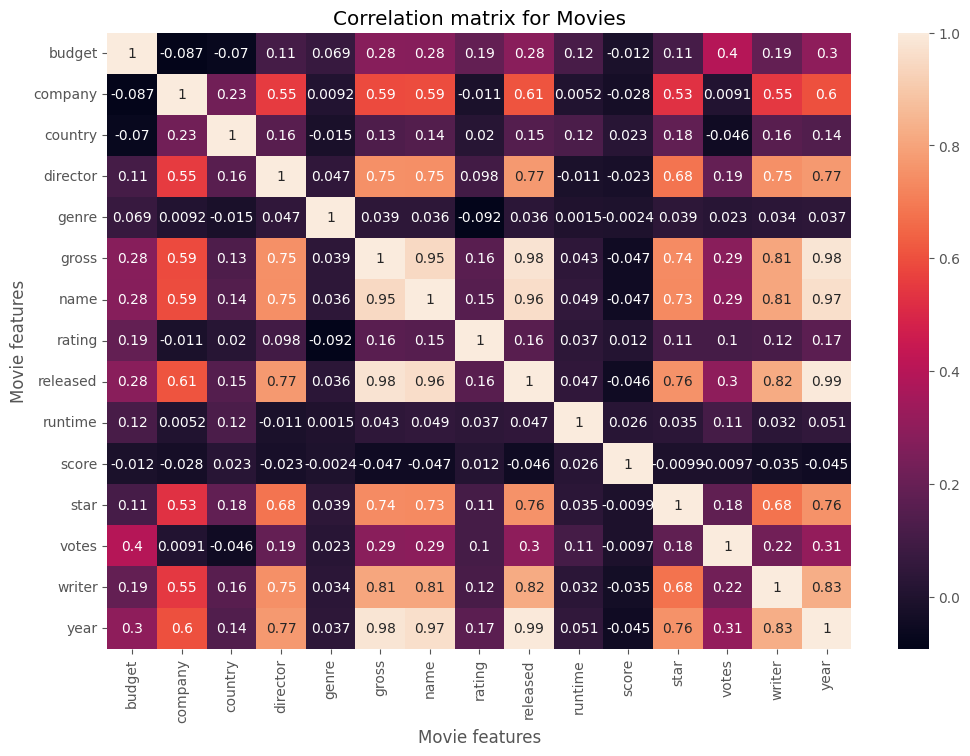

In [62]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

# Sort the column and index labels in alphabetical order
correlation_matrix = correlation_matrix.sort_index(axis=0).sort_index(axis=1)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [57]:

# Print the correlation matrix
#print("Correlation Matrix:")
#print(correlation_matrix)
df.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.143938,0.036367,0.965761,0.959015,0.097100,0.202891,0.745905,0.805211,0.731565,0.142828,0.282854,0.233235,0.591667,0.109904
rating,0.143938,1.000000,-0.086723,0.156713,0.146606,-0.046767,0.097464,0.085520,0.103623,0.093116,0.000494,0.241708,0.195297,-0.028035,0.054851
genre,0.036367,-0.086723,1.000000,0.037184,0.035940,0.037691,0.026101,0.047288,0.033688,0.038649,-0.015795,0.080498,0.094429,0.009566,-0.149015
year,0.965761,0.156713,0.037184,1.000000,0.993190,0.097995,0.222945,0.770497,0.824770,0.756400,0.140216,0.309212,0.261900,0.601571,0.120811
released,0.959015,0.146606,0.035940,0.993190,1.000000,0.099636,0.209757,0.770876,0.819617,0.754468,0.148468,0.291843,0.249899,0.607954,0.118495
score,0.097100,-0.046767,0.037691,0.097995,0.099636,1.000000,0.409182,0.053239,0.070057,0.065434,0.179614,0.055665,0.186392,0.083457,0.399451
votes,0.202891,0.097464,0.026101,0.222945,0.209757,0.409182,1.000000,0.094676,0.127661,0.092592,-0.047954,0.486862,0.632834,-0.053633,0.309212
director,0.745905,0.085520,0.047288,0.770497,0.770876,0.053239,0.094676,1.000000,0.748340,0.682385,0.155471,0.083553,0.121239,0.552258,-0.048811
writer,0.805211,0.103623,0.033688,0.824770,0.819617,0.070057,0.127661,0.748340,1.000000,0.675685,0.157202,0.169747,0.144842,0.546151,0.047184
star,0.731565,0.093116,0.038649,0.756400,0.754468,0.065434,0.092592,0.682385,0.675685,1.000000,0.182045,0.087725,0.117542,0.527116,0.019187


In [66]:
# Create Correct Year Colunm
df['yearcorrect'] = df['released'].astype(str).str[:4]

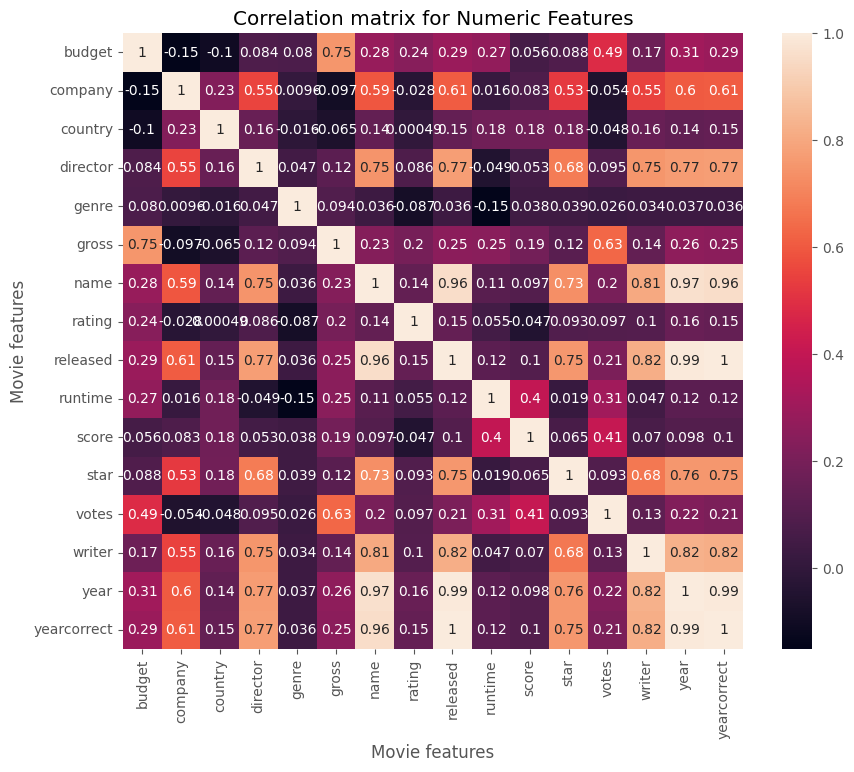

In [67]:
# Select the numerical columns for correlation calculation
#numerical_fields = ['year', 'score', 'votes', 'budget', 'gross', 'runtime']
#numerical_df = df[numerical_fields]

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Sort the column and index labels in alphabetical order
correlation_matrix = correlation_matrix.sort_index(axis=0).sort_index(axis=1)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True)
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
#plt.title('Correlation Heatmap')
plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()


<Axes: xlabel='budget', ylabel='gross'>

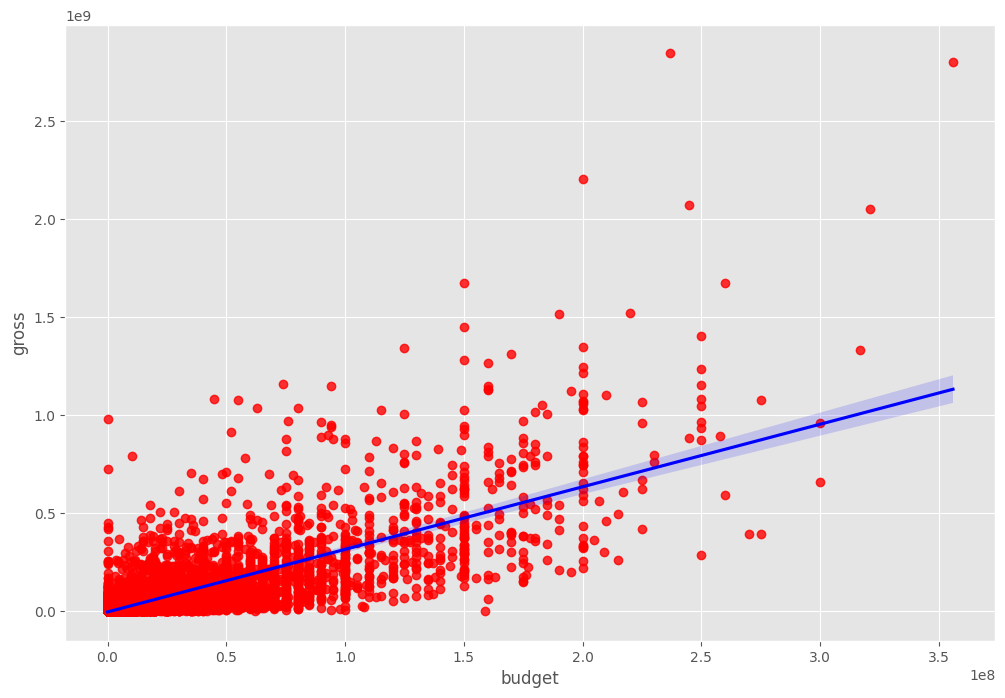

In [55]:
# Plot budget vs gross using seaborn  - To find correlation

sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [52]:
# Convert categorical columns to numeric representation
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.factorize(df[column])[0]

# Print the updated DataFrame
print(df)


      name  rating  genre  year  released  score      votes  director  writer   
0        0       0      0  1980         0    8.4   927000.0         0       0  \
1        1       0      1  1980         1    5.8    65000.0         1       1   
2        2       1      2  1980         2    8.7  1200000.0         2       2   
3        3       1      3  1980         1    7.7   221000.0         3       3   
4        4       0      3  1980         3    7.3   108000.0         4       4   
...    ...     ...    ...   ...       ...    ...        ...       ...     ...   
7663  7507      -1      0  2020      3411    3.1       18.0      2944    4530   
7664  7508      -1      3  2020      3398    4.7       36.0      2945    4531   
7665  7509      -1      0  2020      3412    5.7       29.0      2946    4532   
7666  7510      -1      0  2020      3405    NaN        NaN      2947    4533   
7667  7511      -1      4  2020      3413    5.7        7.0      2948    4534   

      star  country    budg

In [53]:
df.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.143938,0.036367,0.965761,0.959015,0.097100,0.202891,0.745905,0.805211,0.731565,0.142828,0.282854,0.233235,0.591667,0.109904
rating,0.143938,1.000000,-0.086723,0.156713,0.146606,-0.046767,0.097464,0.085520,0.103623,0.093116,0.000494,0.241708,0.195297,-0.028035,0.054851
genre,0.036367,-0.086723,1.000000,0.037184,0.035940,0.037691,0.026101,0.047288,0.033688,0.038649,-0.015795,0.080498,0.094429,0.009566,-0.149015
year,0.965761,0.156713,0.037184,1.000000,0.993190,0.097995,0.222945,0.770497,0.824770,0.756400,0.140216,0.309212,0.261900,0.601571,0.120811
released,0.959015,0.146606,0.035940,0.993190,1.000000,0.099636,0.209757,0.770876,0.819617,0.754468,0.148468,0.291843,0.249899,0.607954,0.118495
score,0.097100,-0.046767,0.037691,0.097995,0.099636,1.000000,0.409182,0.053239,0.070057,0.065434,0.179614,0.055665,0.186392,0.083457,0.399451
votes,0.202891,0.097464,0.026101,0.222945,0.209757,0.409182,1.000000,0.094676,0.127661,0.092592,-0.047954,0.486862,0.632834,-0.053633,0.309212
director,0.745905,0.085520,0.047288,0.770497,0.770876,0.053239,0.094676,1.000000,0.748340,0.682385,0.155471,0.083553,0.121239,0.552258,-0.048811
writer,0.805211,0.103623,0.033688,0.824770,0.819617,0.070057,0.127661,0.748340,1.000000,0.675685,0.157202,0.169747,0.144842,0.546151,0.047184
star,0.731565,0.093116,0.038649,0.756400,0.754468,0.065434,0.092592,0.682385,0.675685,1.000000,0.182045,0.087725,0.117542,0.527116,0.019187


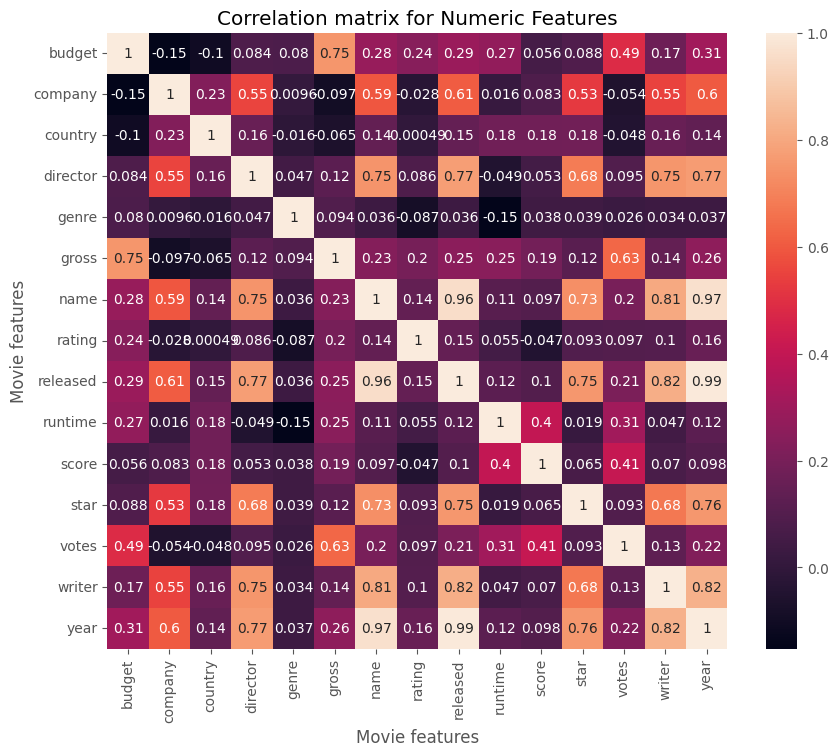

In [60]:
# Create a heatmap of the correlation matrix
correlation_matrix = df.corr()

# Sort the column and index labels in alphabetical order
correlation_matrix = correlation_matrix.sort_index(axis=0).sort_index(axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True)
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

#plt.title('Correlation Heatmap')
plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()


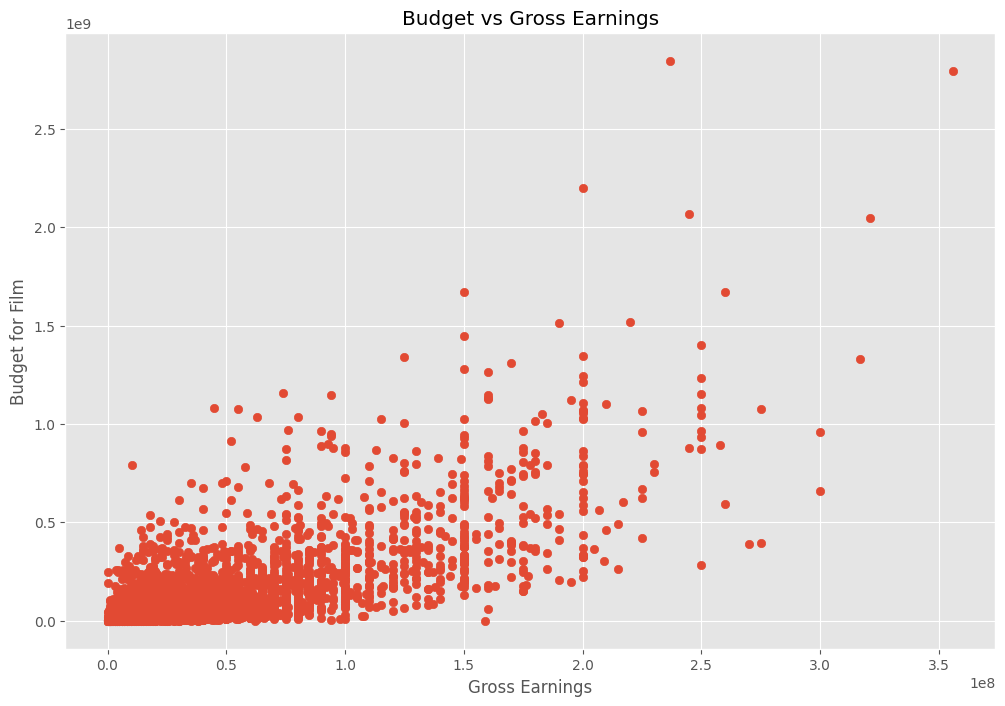

In [37]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

In [ ]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)

<Axes: xlabel='budget', ylabel='gross'>

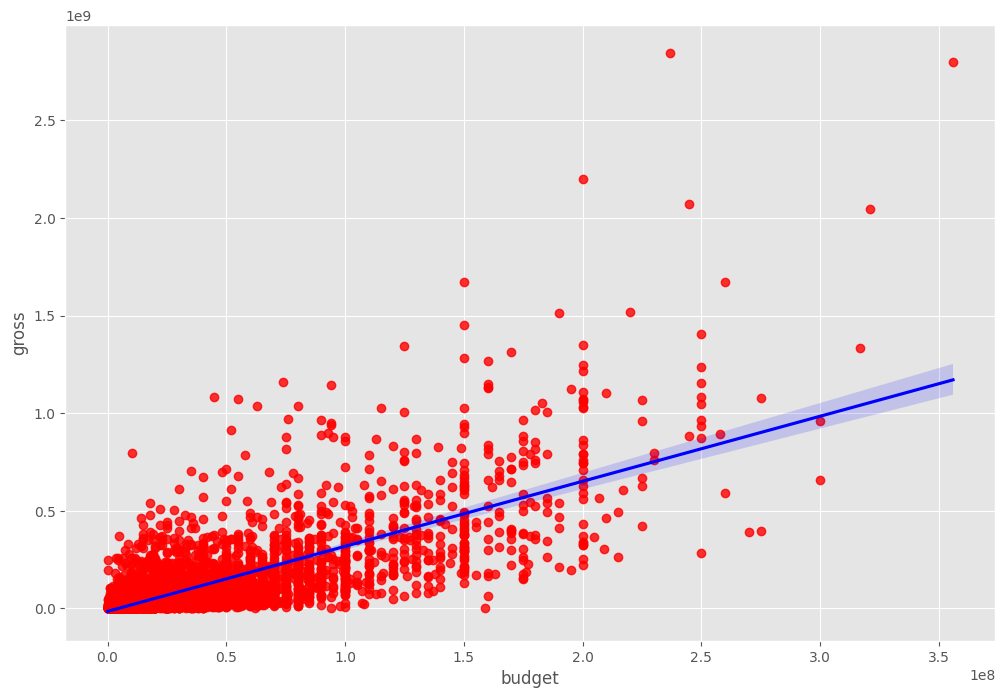

In [38]:
# Plot budget vs gross using seaborn  - To find correlation

#sns.regplot(x="gross", y="budget", data=df)
#sns.regplot(x="gross", y="budget", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [36]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,0,0,0,1980,0,8.4,927000.0,0,0,0,0,19000000.0,46998772.0,0,146.0
1,1,0,1,1980,1,5.8,65000.0,1,1,1,1,4500000.0,58853106.0,1,104.0
2,2,1,2,1980,2,8.7,1200000.0,2,2,2,1,18000000.0,538375067.0,2,124.0
3,3,1,3,1980,1,7.7,221000.0,3,3,3,1,3500000.0,83453539.0,3,88.0
4,4,0,3,1980,3,7.3,108000.0,4,4,4,1,6000000.0,39846344.0,4,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7507,-1,0,2020,3411,3.1,18.0,2944,4530,2810,1,7000.0,NaN,-1,90.0
7664,7508,-1,3,2020,3398,4.7,36.0,2945,4531,2795,1,NaN,NaN,2370,90.0
7665,7509,-1,0,2020,3412,5.7,29.0,2946,4532,2811,1,58750.0,NaN,2383,NaN
7666,7510,-1,0,2020,3405,NaN,NaN,2947,4533,2812,1,15000.0,NaN,-1,120.0


In [81]:
df.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,0.143938,0.036367,0.965761,0.959015,0.097100,0.202891,0.745905,0.805211,0.731565,0.142828,0.282854,0.233235,0.591667,0.109904,0.959015
rating,0.143938,1.000000,-0.086723,0.156713,0.146606,-0.046767,0.097464,0.085520,0.103623,0.093116,0.000494,0.241708,0.195297,-0.028035,0.054851,0.146606
genre,0.036367,-0.086723,1.000000,0.037184,0.035940,0.037691,0.026101,0.047288,0.033688,0.038649,-0.015795,0.080498,0.094429,0.009566,-0.149015,0.035940
year,0.965761,0.156713,0.037184,1.000000,0.993190,0.097995,0.222945,0.770497,0.824770,0.756400,0.140216,0.309212,0.261900,0.601571,0.120811,0.993190
released,0.959015,0.146606,0.035940,0.993190,1.000000,0.099636,0.209757,0.770876,0.819617,0.754468,0.148468,0.291843,0.249899,0.607954,0.118495,1.000000
score,0.097100,-0.046767,0.037691,0.097995,0.099636,1.000000,0.409182,0.053239,0.070057,0.065434,0.179614,0.055665,0.186392,0.083457,0.399451,0.099636
votes,0.202891,0.097464,0.026101,0.222945,0.209757,0.409182,1.000000,0.094676,0.127661,0.092592,-0.047954,0.486862,0.632834,-0.053633,0.309212,0.209757
director,0.745905,0.085520,0.047288,0.770497,0.770876,0.053239,0.094676,1.000000,0.748340,0.682385,0.155471,0.083553,0.121239,0.552258,-0.048811,0.770876
writer,0.805211,0.103623,0.033688,0.824770,0.819617,0.070057,0.127661,0.748340,1.000000,0.675685,0.157202,0.169747,0.144842,0.546151,0.047184,0.819617
star,0.731565,0.093116,0.038649,0.756400,0.754468,0.065434,0.092592,0.682385,0.675685,1.000000,0.182045,0.087725,0.117542,0.527116,0.019187,0.754468


In [82]:
# Sort the column and index labels in alphabetical order
correlation_matrix = correlation_matrix.sort_index(axis=0).sort_index(axis=1)

In [ ]:
# To allow all rows to display - disable the default setting

pd.set_option('display.max_row', None)

correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

In [7]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Unstack the correlation matrix
corr_pairs = correlation_matrix.unstack()
#unstacked_matrix = correlation_matrix.unstack()

# Print the unstacked matrix
#print(unstacked_matrix)

corr_pairs

ValueError: could not convert string to float: 'The Shining'

In [8]:
# Paring the fields

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

NameError: name 'corr_pairs' is not defined

In [73]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

company      star           0.527116
star         company        0.527116
writer       company        0.546151
company      writer         0.546151
director     company        0.552258
company      director       0.552258
name         company        0.591667
company      name           0.591667
             year           0.601571
year         company        0.601571
company      released       0.607954
             yearcorrect    0.607954
yearcorrect  company        0.607954
released     company        0.607954
votes        gross          0.632834
gross        votes          0.632834
writer       star           0.675685
star         writer         0.675685
director     star           0.682385
star         director       0.682385
name         star           0.731565
star         name           0.731565
name         director       0.745905
director     name           0.745905
             writer         0.748340
writer       director       0.748340
budget       gross          0.750157
g

In [93]:
# We can now take a look at the ones that have a high correlation (> 0.5)

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

#print(strong_pairs)

strong_pairs

company      star           0.527116
star         company        0.527116
writer       company        0.546151
company      writer         0.546151
director     company        0.552258
company      director       0.552258
name         company        0.591667
company      name           0.591667
             year           0.601571
year         company        0.601571
company      released       0.607954
             yearcorrect    0.607954
yearcorrect  company        0.607954
released     company        0.607954
votes        gross          0.632834
gross        votes          0.632834
writer       star           0.675685
star         writer         0.675685
director     star           0.682385
star         director       0.682385
name         star           0.731565
star         name           0.731565
name         director       0.745905
director     name           0.745905
             writer         0.748340
writer       director       0.748340
budget       gross          0.750157
g

In [94]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

budget       company       -0.151615
company      budget        -0.151615
genre        runtime       -0.149015
runtime      genre         -0.149015
country      budget        -0.104962
budget       country       -0.104962
company      gross         -0.096976
gross        company       -0.096976
genre        rating        -0.086723
rating       genre         -0.086723
country      gross         -0.064861
gross        country       -0.064861
votes        company       -0.053633
company      votes         -0.053633
runtime      director      -0.048811
director     runtime       -0.048811
country      votes         -0.047954
votes        country       -0.047954
rating       score         -0.046767
score        rating        -0.046767
company      rating        -0.028035
rating       company       -0.028035
country      genre         -0.015795
genre        country       -0.015795
country      rating         0.000494
rating       country        0.000494
company      genre          0.009566
g

In [98]:
# Looking at the top 15 companies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64